In [163]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'svg' # For mac users with Retina display

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
import healpy as hp

import sys
sys.path.append('src/')
from pSZ import pSZ
from profiles import cNFW_grid, cNFW, M500toR500

import scipy.ndimage as ndimage
import scipy.interpolate

arcmin2rad = np.pi / 180. / 60. 
rad2arcmin = 1./arcmin2rad

def GaussSmooth(map, fwhm, reso, order=0):
    """
    Smooth the map with a Gaussian beam specified by its FWHM (in arcmin).
    - fwhm: 
    - reso: pixel resolution (in arcmin)
    """
    # reso_  = reso * 180.*60./np.pi # in arcmin
    sigma  = fwhm / np.sqrt(8*np.log(2)) / reso
    # print("\t smoothing map with sigma = %4f" %sigma)
    return ndimage.gaussian_filter(map, sigma=sigma, order=order)

def GenerateRndPointsS2(size, ra_min=0, ra_max=360, dec_min=-90, dec_max=90 ):
    ras  = np.rad2deg(np.random.uniform(np.deg2rad(ra_min), np.deg2rad(ra_max), size))
    decs = np.rad2deg(np.arcsin(np.random.uniform(np.sin(np.deg2rad(dec_min)),np.sin(np.deg2rad(dec_max)), size)))
    return ras, decs

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
theory = pSZ()


9.457812915945686e-27 1.008266641788727 393.9862254904859 7.474665814854842
1.053684801321415e-26 1.0039982637043463 703.9873665606874 4.165484436351112
1.9194535898280418e-26 1.0033591877795045 1516.4125555964401 1.9325755474199635


Text(0, 0.5, '$\\tau(\\theta,z)E(z)^{-2}$')

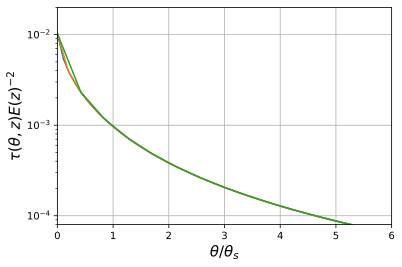

In [6]:
thetas = np.linspace(0,40)
plt.semilogy(thetas/7.5,  cNFW(theory.bkd, thetas, 0.1, M=3e14)*(theory.bkd.hubble_parameter(0.1)/67.8)**(-2))
plt.semilogy(thetas/4.16, cNFW(theory.bkd, thetas, 0.2, M=3.3e14)*(theory.bkd.hubble_parameter(0.2)/67.8)**(-2))
plt.semilogy(thetas/1.93, cNFW(theory.bkd, thetas, 0.7, M=6e14)*(theory.bkd.hubble_parameter(0.7)/67.8)**(-2))
plt.grid()
plt.ylim(8e-5,2e-2)
plt.xlim(0,6)
plt.xlabel(r'$\theta/\theta_s$',size=15)
plt.ylabel(r'$\tau(\theta,z)E(z)^{-2}$',size=15)


In [57]:
M = 4e14

In [58]:
tau = cNFW_grid(theory.bkd, 0.4, M=M)

In [59]:
N = tau.shape[0]
ones = np.ones(N)
inds  = (np.arange(N) + .5 - N/2.)

## angles relative to 1 degrees
R = np.outer(ones, inds) * 0.2 /60.

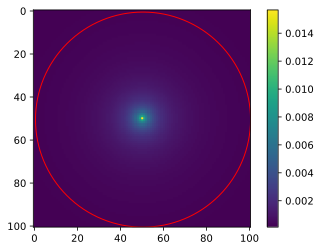

In [69]:
circle1 = plt.Circle((N/2, N/2), 10/0.2, color='r', fill=False)

fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot
im = ax.imshow(tau)
# ax.imshow(tau)
ax.add_artist(circle1)
plt.colorbar(im)

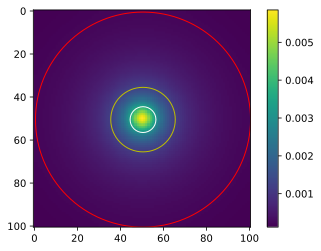

In [84]:
circle1 = plt.Circle((N/2, N/2), 10/0.2, color='r', fill=False)
circle2 = plt.Circle((N/2, N/2), 1.2/0.2, color='w', fill=False)
circle3 = plt.Circle((N/2, N/2), 3/0.2, color='y', fill=False)

fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot
im = ax.imshow(GaussSmooth(tau, 1.2, 0.2))
ax.add_artist(circle1)
ax.add_artist(circle2)
ax.add_artist(circle3)
plt.colorbar(im)



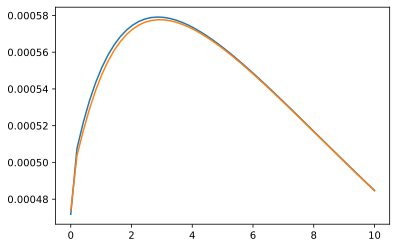

In [77]:
theta_max = 10.
plt.plot(np.linspace(0,theta_max), [np.mean(tau[R < i/60]) for i in np.linspace(0,theta_max)])
plt.plot(np.linspace(0,theta_max), [np.mean(GaussSmooth(tau, 1.2, 0.2)[R < i/60]) for i in np.linspace(0,theta_max)])

In [79]:
M500toR500(theory.bkd, 0.4, M=4e14)

0.9905693321279235

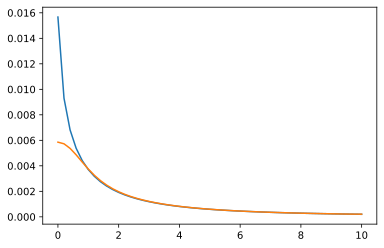

In [88]:
plt.plot(R[int(101/2),int(101/2):]*60, tau[int(101/2),int(101/2):])
plt.plot(R[int(101/2),int(101/2):]*60, GaussSmooth(tau, 1.2, 0.2)[int(101/2),int(101/2):])

In [81]:
np.rad2deg(M500toR500(theory.bkd, 0.4, M=4e14)/theory.bkd.angular_diameter_distance(0.4))*60

2.9777156512394813

In [90]:
Pc_z0p4, Qc_z0p4, Uc_z0p4 = theory.remote_quadrupole(0.4, nside=2048, return_QU=1)

/Users/fbianchini/anaconda2/envs/py3/lib/python3.6/site-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [174]:
Pcorr_zoom = hp.gnomview(Pc_z0p4, reso=0.2, xsize=101, return_projected_map=1);plt.close()
Qcorr_zoom = hp.gnomview(Qc_z0p4, reso=0.2, xsize=101, return_projected_map=1);plt.close()
Ucorr_zoom = hp.gnomview(Uc_z0p4, reso=0.2, xsize=101, return_projected_map=1);plt.close()


In [167]:
ras_3g, decs_3g = GenerateRndPointsS2(1000, ra_min=-50, ra_max=50, dec_min=-70, dec_max=-40 )

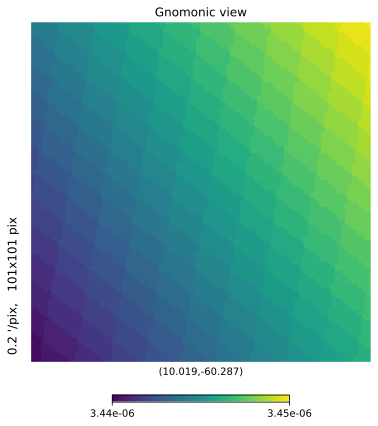

In [175]:
Pcorr_zoom = hp.gnomview(Pc_z0p4, rot=[ras_3g[0], decs_3g[0]], reso=0.2, xsize=101, return_projected_map=1)
Qcorr_zoom = hp.gnomview(Qc_z0p4, rot=[ras_3g[0], decs_3g[0]], reso=0.2, xsize=101, return_projected_map=1);plt.close()
Ucorr_zoom = hp.gnomview(Uc_z0p4, rot=[ras_3g[0], decs_3g[0]], reso=0.2, xsize=101, return_projected_map=1);plt.close()


In [229]:
d = (GaussSmooth(Qcorr_zoom, 1.2, 0.2) + 1j*GaussSmooth(Ucorr_zoom, 1.2, 0.2))*GaussSmooth(tau, 1.2, 0.2)
p = (GaussSmooth(Qcorr_zoom, 1.2, 0.2) + 1j*GaussSmooth(Ucorr_zoom, 1.2, 0.2))
# d = (Qcorr_zoom + 1j*Ucorr_zoom)*GaussSmooth(tau, 1.2, 0.2)

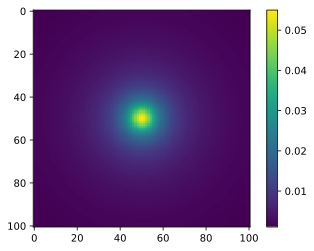

In [230]:
plt.imshow(np.abs(d)*2.725e6);plt.colorbar()

In [222]:
np.sum((d*GaussSmooth(tau, 1.2, 0.2))[R < 3./60])/np.sum(GaussSmooth(tau, 1.2, 0.2)[R < 3/60]**2)

(2.8348663789846636e-07-3.4326427789229478e-06j)

In [207]:
np.mean(p[R < 3./60])

(2.971759954071956e-07-3.4306464443730377e-06j)

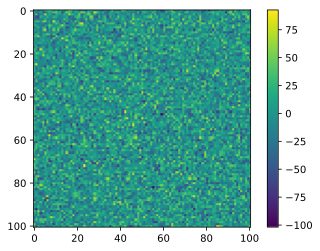

In [198]:
plt.imshow(np.abs(d)*2.725e6+np.random.randn(101**2).reshape((101,101))*(5. / 0.2));plt.colorbar()

In [270]:
1./np.dot(GaussSmooth(tau, 1.2, 0.2).flatten(), np.dot(np.diag(np.ones(101*101)*1./(5. / 0.2)**2), GaussSmooth(tau, 1.2, 0.2).flatten()) )

104887.44376280325

In [273]:
((5. / 0.2)**2/np.sum(GaussSmooth(tau, 1.2, 0.2)**2))

104887.44376280323

In [286]:
np.sqrt(((5. / 0.2)**2/np.sum(GaussSmooth(tau, 1.2, 0.2)**2)))

323.8633103066836

In [288]:
tau_smooth = GaussSmooth(tau, 1.2, 0.2)

In [267]:
def GetNoiseMap(npix, delta_P, reso):
    return np.random.randn(npix**2).reshape((npix,npix))*(delta_P / reso)

def GetP(data, tau, theta_max, R):
    """
    tau already beam smoothed
    """
#     print(data)
    return np.sum((data*tau)[R < theta_max/60])/np.sum(tau[R < theta_max/60]**2)
    

class pSZSims():
    def __init__(self, theory, ):
        self.theory = theory
        
    def GetVarAlpha(nclusters, z, M, delta_p, beam, reso, theta_max=20):
        tau = cNFW_grid(self.theory.bkd, z, M=M, reso=reso, theta_max=theta_max)
        tau_beam = GaussSmooth(tau, beam, reso)
        
        ras_3g_tmp, decs_3g_tmp = GenerateRndPointsS2(nclusters, ra_min=-50, ra_max=50, dec_min=-70, dec_max=-40 )
        
        Pc_tmp, Qc_tmp, Uc_tmp = self.theory.remote_quadrupole(z, nside=2048, return_QU=1)
        
        for idx in range(nclusters):
            # Extract cutouts
            Qcorr_tmp = hp.gnomview(Qc_tmp, rot=[ras_3g[idx], decs_3g[idx]], reso=reso, xsize=tau.shape[0], return_projected_map=1);plt.close()
            Ucorr_tmp = hp.gnomview(Uc_tmp, rot=[ras_3g[idx], decs_3g[idx]], reso=reso, xsize=tau.shape[0], return_projected_map=1);plt.close()
            data_tmp  = (Qcorr_tmp + 1j*Ucorr_tmp) * GaussSmooth(tau, beam, reso)
            
        

In [280]:
GetP(d+GetNoiseMap(101,5,0.2), GaussSmooth(tau, 1.2, 0.2), 3, R)

(-371.02703216391274-3.4326427789229478e-06j)

In [279]:
GetP(p, np.ones_like(p), 3, R)

(2.971759954071956e-07-3.4306464443730377e-06j)

In [294]:
np.std([GetP(d+GetNoiseMap(101,5,0.2), tau_smooth, 3, R) for i in range(3000)])

347.3339148614291

In [296]:
np.std([GetP(d+GetNoiseMap(101,7,0.2), tau_smooth, 3, R) for i in range(3000)])

474.8072213783101